# HMGCR summary

In [1]:
import pandas as pd
pd.set_option('display.max_colwidth', None) # show entire column contents, important!
from IPython.display import HTML, display
import hpotk
from hpotk.ontology import Ontology
from hpotk.ontology.load.obographs import load_ontology
from pyphetools.creation import AllelicRequirement
from pyphetools.visualization import *
import importlib.metadata
__version__ = importlib.metadata.version("pyphetools")
print(f"Using pyphetools version {__version__}")

Using pyphetools version 0.9.78


/Users/robin/GIT/phenopacket-store/ps24venv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [2]:
hpo: Ontology = load_ontology('../hp.json')
ingestor = PhenopacketIngestor(indir="phenopackets")

[pyphetools] Ingested 15 GA4GH phenopackets.


In [3]:
ppkt_d = ingestor.get_phenopacket_dictionary()
ppkt_list = list(ppkt_d.values())
detailed_table = DetailedSupplTable(patient_d=ppkt_d, hp_ontology=hpo)
display(HTML(detailed_table.get_html_table_by_pmid(min_count=1)))

HPO term,PMID:37167966,PMID:36745799
Elevated circulating creatine kinase concentration (HP:0003236),9/9 (100.0%),5/6 (83.3%)
Proximal muscle weakness (HP:0003701),9/9 (100.0%),0/6 (0.0%)
Axial muscle weakness (HP:0003327),7/9 (77.8%),0/6 (0.0%)
Reduced tendon reflexes (HP:0001315),6/9 (66.7%),0/6 (0.0%)
Exercise-induced myalgia (HP:0003738),0/9 (0.0%),6/6 (100.0%)
Loss of ambulation (HP:0002505),2/9 (22.2%),3/6 (50.0%)
Proximal muscle weakness in lower limbs (HP:0008994),0/9 (0.0%),5/6 (83.3%)
Type 1 muscle fiber predominance (HP:0003803),4/9 (44.4%),0/6 (0.0%)
Proximal muscle weakness in upper limbs (HP:0008997),0/9 (0.0%),4/6 (66.7%)
Upper limb amyotrophy (HP:0009129),0/9 (0.0%),4/6 (66.7%)


In [4]:
pcharts = PhenopacketCharts(indir="phenopackets")

[pyphetools] Ingested 15 GA4GH phenopackets.


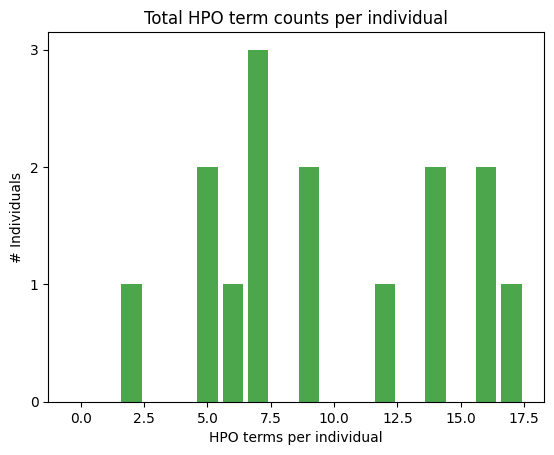

In [5]:
pcharts.terms_per_phenopacket();

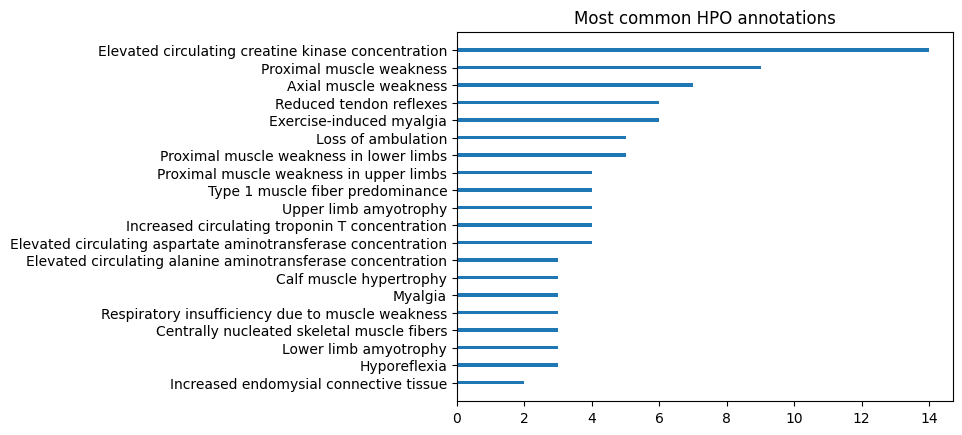

In [6]:
 pcharts.most_common_hpo_terms(20);

In [7]:
ingestor = PhenopacketIngestor(indir="phenopackets")
ppkt_d = ingestor.get_phenopacket_dictionary()
ppkt_list = list(ppkt_d.values())

[pyphetools] Ingested 15 GA4GH phenopackets.


In [8]:
builder = HpoaTableBuilder(phenopacket_list=ppkt_list)

In [9]:
builder = HpoaTableBuilder(indir="phenopackets")

In [12]:
PMID2 = "PMID:36745799"
builder.autosomal_recessive(PMID)
hpoa_table_creator = builder.build()
df = hpoa_table_creator.get_dataframe()
df.head()

We found a total of 33 unique HPO terms
Extracted disease: Muscular dystrophy, limb-girdle, autosomal recessive 28 (OMIM:620375)


,#diseaseID,diseaseName,phenotypeID,phenotypeName,onsetID,onsetName,frequency,sex,negation,modifier,description,publication,evidence,biocuration
0,OMIM:620375,"Muscular dystrophy, limb-girdle, autosomal recessive 28",HP:0003236,Elevated circulating creatine kinase concentration,,,9/9,,,,,PMID:37167966,PCS,ORCID:0000-0002-0736-9199[2024-04-19]
1,OMIM:620375,"Muscular dystrophy, limb-girdle, autosomal recessive 28",HP:0003701,Proximal muscle weakness,,,9/9,,,,,PMID:37167966,PCS,ORCID:0000-0002-0736-9199[2024-04-19]
2,OMIM:620375,"Muscular dystrophy, limb-girdle, autosomal recessive 28",HP:0003327,Axial muscle weakness,,,7/7,,,,,PMID:37167966,PCS,ORCID:0000-0002-0736-9199[2024-04-19]
3,OMIM:620375,"Muscular dystrophy, limb-girdle, autosomal recessive 28",HP:0008981,Calf muscle hypertrophy,,,3/3,,,,,PMID:37167966,PCS,ORCID:0000-0002-0736-9199[2024-04-19]
4,OMIM:620375,"Muscular dystrophy, limb-girdle, autosomal recessive 28",HP:0003326,Myalgia,,,3/3,,,,,PMID:37167966,PCS,ORCID:0000-0002-0736-9199[2024-04-19]


In [13]:
hpoa_table_creator.write_data_frame()

Wrote HPOA disease file to OMIM-620375.tab
